In [34]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, pointbiserialr
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import os



In [3]:
dataset_dir = os.path.join(os.path.dirname(os.path.dirname(os.path.abspath(''))), 'datasets')

In [87]:
llamados_v5= pd.read_excel(os.path.join(dataset_dir, 'xlsx/llamados_v5.xlsx'), parse_dates=['llamado_fecha_hora'])


In [5]:
# fecha hora to timestamp

llamados_v5['llamado_fecha_hora'] = llamados_v5['llamado_fecha_hora'].apply(lambda x: x.timestamp())


#### Point biserial correlation 
Para medir asociación entre variables binarias y continuas

In [6]:
completo_edades = llamados_v5[~(llamados_v5['victima_edad'].isnull()) & ~(llamados_v5['llamante_edad'].isnull()) & ~(llamados_v5['victima_convive_agresor'] == 'NS/NC')]


del llamados_v5

In [7]:
# Map target to binary values
completo_edades['victima_convive_agresor'] = completo_edades['victima_convive_agresor'].map({'SI': 1, 'NO': 0})

In [8]:
# Check normality of continuous variable
stat, p = shapiro(completo_edades['victima_edad'])
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Shapiro-Wilk Test: Statistics=0.886, p=0.000
Sample does not look Gaussian (reject H0)


/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_1971/1712167121.py:2: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8936.
  stat, p = shapiro(completo_edades['victima_edad'])


In [9]:
# Check normality of continuous variable
stat, p = shapiro(completo_edades['llamante_edad'])
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Shapiro-Wilk Test: Statistics=0.974, p=0.000
Sample does not look Gaussian (reject H0)


/var/folders/gm/4r6lhs5j5p12g3_ml4zjfy500000gq/T/ipykernel_1971/3329373257.py:2: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8936.
  stat, p = shapiro(completo_edades['llamante_edad'])


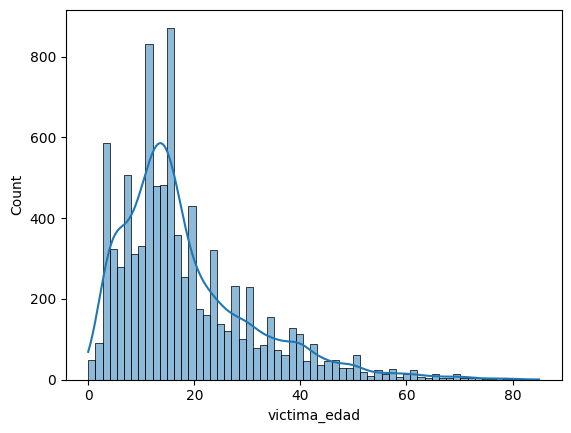

In [10]:
# Visual inspection
sns.histplot(completo_edades['victima_edad'], kde=True)
plt.show()

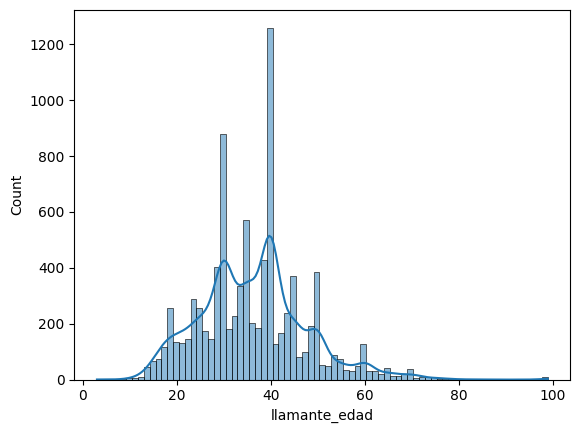

In [11]:
# Visual inspection
sns.histplot(completo_edades['llamante_edad'], kde=True)
plt.show()

In [12]:
# point biserial correlation
from scipy.stats import  pointbiserialr

numerical_variables = ['llamante_edad','victima_edad']

# Calculate Point-Biserial correlation for numerical and binary categorical variables
point_biserial_results = {}
for variable in numerical_variables:
        correlation, p = pointbiserialr(completo_edades[variable], completo_edades['victima_convive_agresor'])
        point_biserial_results[variable] = {'Correlation': correlation, 'p-value': p}

In [13]:
# Convert results to DataFrame
results_df = pd.DataFrame(point_biserial_results)
print(results_df.round(4))

             llamante_edad  victima_edad
Correlation         0.0377       -0.2005
p-value             0.0004        0.0000


### Phi coefficient
Para medir asociación entre variables binarias:violencia (todas), fin de semana,  resguardo, caso judicializado, contra convive. 

#### Variables binarias:
'vs_explotacion_sexual_group','vs_violacion_group','vs_tentativa_group', 'vs_tocamiento_sexual','vs_intento_tocamiento', 'vs_grooming', 'vs_exhibicionismo','vs_obligacion_sacarse_fotos_pornograficas', 'vs_acoso_sexual','vs_iniciacion_sexual_forzada_inducida', 'vs_otra_forma_violencia_sexual','vs_no_sabe_no_contesta', 'ofv_sentimiento_amenaza','ofv_amenaza_explicita','ofv_violencia_fisica','ofv_enganio_seduccion','ofv_grooming','ofv_otra_forma_violencia','ofv_no_sabe_no_contesta','victima_a_resguardo' 

In [93]:
df_ = llamados_v5.select_dtypes(exclude=['int', 'float','datetime64[ns]' ])
cat_list= []
for col in df_.columns:
    cat_list.append(col)

In [70]:
bin_list = ['vs_explotacion_sexual_group','vs_violacion_group','vs_tentativa_group', 'vs_tocamiento_sexual','vs_intento_tocamiento', 'vs_grooming', 'vs_exhibicionismo','vs_obligacion_sacarse_fotos_pornograficas', 'vs_acoso_sexual','vs_iniciacion_sexual_forzada_inducida', 'vs_otra_forma_violencia_sexual','vs_no_sabe_no_contesta', 'ofv_sentimiento_amenaza','ofv_amenaza_explicita','ofv_violencia_fisica','ofv_enganio_seduccion','ofv_grooming','ofv_otra_forma_violencia','ofv_no_sabe_no_contesta','victima_a_resguardo']

In [71]:
completo_convive = llamados_v5[~(llamados_v5['victima_convive_agresor'] == 'NS/NC')]


In [ ]:
# Map target to binary values
completo_convive['victima_convive_agresor'] = completo_convive['victima_convive_agresor'].map({'SI': 1, 'NO': 0})

for col in bin_list:
    completo_convive[col] = completo_convive[col].map({'SI': 1, 'NO':0})

In [92]:
bin_list = ['fin_de_semana','vs_explotacion_sexual_group','vs_violacion_group','vs_tentativa_group', 'vs_tocamiento_sexual','vs_intento_tocamiento', 'vs_grooming', 'vs_exhibicionismo','vs_obligacion_sacarse_fotos_pornograficas', 'vs_acoso_sexual','vs_iniciacion_sexual_forzada_inducida', 'vs_otra_forma_violencia_sexual','vs_no_sabe_no_contesta', 'ofv_sentimiento_amenaza','ofv_amenaza_explicita','ofv_violencia_fisica','ofv_enganio_seduccion','ofv_grooming','ofv_otra_forma_violencia','ofv_no_sabe_no_contesta','victima_a_resguardo']

In [76]:
# Calculate phi coefficient
def calculate_phi_coefficient(contingency_table):
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    phi = np.sqrt(chi2 / n)
    return phi, p



In [75]:
contingency_table

fin_de_semana
victima_convive_agresor


In [77]:
# List to store results
phi_results = []

# Iterate over each binary variable in bin_list
for var in bin_list:
    # Create a contingency table
    contingency_table = pd.crosstab(completo_convive['victima_convive_agresor'], completo_convive[var])
    
    # Calculate phi coefficient
    phi, p_value = calculate_phi_coefficient(contingency_table)
    
    # Append results
    phi_results.append({'Variable': var, 'Phi Coefficient': phi, 'P-value': round(p_value, 6)})

# Convert results to DataFrame
phi_results_df = pd.DataFrame(phi_results)

# Print the results
print(phi_results_df)

                                     Variable  Phi Coefficient   P-value
0                               fin_de_semana         0.010664  0.190263
1                 vs_explotacion_sexual_group         0.059572  0.000000
2                          vs_violacion_group         0.002538  0.755210
3                          vs_tentativa_group         0.006390  0.432564
4                        vs_tocamiento_sexual         0.016028  0.048999
5                       vs_intento_tocamiento         0.003637  0.655076
6                                 vs_grooming         0.164910  0.000000
7                           vs_exhibicionismo         0.024965  0.002168
8   vs_obligacion_sacarse_fotos_pornograficas         0.015149  0.062793
9                             vs_acoso_sexual         0.035271  0.000015
10      vs_iniciacion_sexual_forzada_inducida         0.022801  0.005104
11             vs_otra_forma_violencia_sexual         0.024766  0.002351
12                     vs_no_sabe_no_contesta      

### Correlación Chi2 

In [94]:
chi_list = [n for n in cat_list if n not in bin_list]


In [88]:
llamados_v5.columns

Index(['llamado_fecha_hora', 'llamante_edad', 'llamante_genero',
       'caso_judicializado', 'victima_a_resguardo', 'victima_edad',
       'victima_genero', 'victima_nacionalidad', 'victima_discapacidad',
       'victima_convive_agresor', 'vs_tocamiento_sexual',
       'vs_intento_tocamiento', 'vs_grooming', 'vs_exhibicionismo',
       'vs_obligacion_sacarse_fotos_pornograficas', 'vs_acoso_sexual',
       'vs_iniciacion_sexual_forzada_inducida',
       'vs_otra_forma_violencia_sexual', 'vs_no_sabe_no_contesta',
       'ofv_sentimiento_amenaza', 'ofv_amenaza_explicita',
       'ofv_violencia_fisica', 'ofv_enganio_seduccion', 'ofv_grooming',
       'ofv_otra_forma_violencia', 'ofv_no_sabe_no_contesta',
       'agresor_fam_no_fam', 'genero_agresor', 'agresor_conocido_no_conocido',
       'tipo_vinculo_llamante', 'hecho_lugar_red', 'fin_de_semana',
       'momento_dia', 'estacion_del_año', 'llamado_provincia_red',
       'vs_explotacion_sexual_group', 'vs_violacion_group',
       'vs_tent

### Chequeamos que se cumplan las condiciones previas

In [95]:
# Initialize a list to store contingency tables
contingency_tables = []

# Iterate through each categorical variable
for variable in chi_list:
    # Create a contingency table
    contingency_table = pd.crosstab(index=llamados_v5['victima_convive_agresor'], columns=llamados_v5[variable])
    
    # Append the contingency table to the list
    contingency_tables.append(contingency_table)

# Combine all contingency tables into a single table
combined_contingency_table = pd.concat(contingency_tables, axis=1)

# Calculate expected frequencies
expected_frequencies = chi2_contingency(combined_contingency_table)[3]

# Check condition 5: No expected frequencies should be 0
if (expected_frequencies > 1).all():
    print("Condition 5: All expected frequencies are greater than 1.")
else:
    print("Condition 5: Not all expected frequencies are greater than 1.")

# Check condition 6: Proportion of cells with expected frequencies less than 5
cells_less_than_5 = (expected_frequencies < 5).sum()
total_cells = combined_contingency_table.size
proportion_less_than_5 = cells_less_than_5 / total_cells

if proportion_less_than_5 <= 0.2:
    print("Condition 6: Proportion of cells with expected frequencies less than 5 is acceptable.")
else:
    print("Condition 6: Proportion of cells with expected frequencies less than 5 is not acceptable.")

Condition 5: All expected frequencies are greater than 1.
Condition 6: Proportion of cells with expected frequencies less than 5 is acceptable.


In [96]:
# Initialize an empty list to store results
results = []


# Perform chi-squared test for each variable combination
for variable in chi_list:
    # Create a contingency table
    contingency_table = pd.crosstab(index=llamados_v5['victima_convive_agresor'], columns=llamados_v5[variable])
    
    # Perform chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Round p-value to 4 decimal places
    p_rounded = round(p, 4)

    # Append results to the list
    results.append({'Variable': variable, 'Chi-Squared Statistic': chi2, 'P-value': p_rounded})

# Convert results list to DataFrame
results_df = pd.DataFrame(results)

# Print the resulting table
results_df

,Variable,Chi-Squared Statistic,P-value
0,llamante_genero,2269.788629,0.0000
1,caso_judicializado,1103.734558,0.0000
2,victima_genero,1739.861270,0.0000
3,victima_nacionalidad,2215.928989,0.0000
4,victima_discapacidad,2713.794896,0.0000
5,victima_convive_agresor,38286.000000,0.0000
6,agresor_fam_no_fam,8051.611932,0.0000
7,genero_agresor,8580.793201,0.0000
8,agresor_conocido_no_conocido,8073.854987,0.0000
9,tipo_vinculo_llamante,3734.981040,0.0000


In [81]:
llamados_v5.llamado_provincia

0        Misiones
1            CABA
2         Tucumán
3        Santa Fe
4        Santa Fe
           ...   
19138        CABA
19139        CABA
19140    Santa Fe
19141        CABA
19142        CABA
Name: llamado_provincia, Length: 19143, dtype: object